In [41]:
import random
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Данная функция отображает диагональ которая разделяет пространство на 2 части. Далее ставит точки в зависимости от принадлежности к множеству.

In [42]:
def draw(p,x1,y1):
    x = np.linspace(-5,5,100)
    y = np.linspace(-5,5,100)
    xt,yt = [],[]
    for i in range(len(x)-1):
        for j in range(len(y)-1):
            if p([x[i],y[j]]) != p([x[i+1],y[j+1]]):
                xt.append(x[i])
                yt.append(y[j])
    plt.plot(xt, yt,'r')
    for k in range(len(x1)):
        i = x1[k]
        if y1[k] == 1:
            plt.scatter(i[0],i[1],c='b')
        else:
            plt.scatter(i[0],i[1],c='g')

In [47]:
class Percerptron:
    def __init__(self, inp, outp=1, a=-5,b=5):
        self.inp = inp
        self.outp = outp
        self.w = [random.randint(-a,b) for x in range(inp)]
        self.w0 = random.randint(-a,b)

    def __call__(self,data):
        return 1 if sum([self.w[i]*data[i] for i in range(len(data))]) >= 0 else 0

    def learn(self,data,res):
        for d in range(len(data)):
            s = sum([self.w[i]*data[d][i] for i in range(len(data[d]))]) + self.w0
            r = 1 if s >= 0 else 0
            self.w = [self.w[i] + data[d][i] * (res[d] - r) for i in range(len(data[d]))]

Первое задание: разделить множество на 2 части.

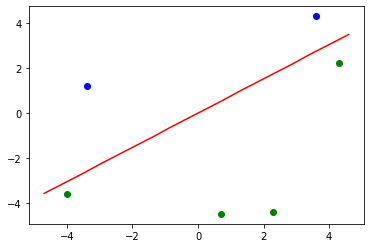

In [44]:
x1 = [[-4,-3.6],[-3.4,1.2],
      [0.7,-4.5],[4.3,2.2],
      [2.3,-4.4],[3.6,4.3]]
y1 = [0,1,0,0,0,1]

p = Percerptron(2,1)
for i in range(50):
    p.learn(x1,y1)
draw(p,x1,y1)

In [116]:
def drawP(p,x1,y1):
    x = np.linspace(-5,5,100)
    y = np.linspace(-5,5,100)
    xt,yt = [],[]
    for i in range(len(x)-1):
        for j in range(len(y)-1):
            if p([x[i],y[j]])[0] != p([x[i+1],y[j+1]])[0]:
                xt.append(x[i])
                yt.append(y[j])
    plt.plot(xt, yt,'r')
    xt,yt = [],[]
    for i in range(len(x)-1):
        for j in range(len(y)-1):
            if p([x[i],y[j]])[1] != p([x[i+1],y[j+1]])[1]:
                xt.append(x[i])
                yt.append(y[j])
    plt.plot(xt, yt,'d')
    for k in range(len(x1)):
        i = x1[k]
        if y1[k] == 1:
            plt.scatter(i[0],i[1],c='b')
        else:
            plt.scatter(i[0],i[1],c='g')

In [117]:
class Percerptrons:
    def __init__(self, inp, outp, a=-5,b=5):
        self.inp = inp
        self.outp = outp
        self.w = [[random.randint(-a,b) for x in range(inp)] for y in range(outp)]
        self.w0 = [random.randint(-a,b) for x in range(inp)]

    def __call__(self,data):
        res = [ min(max(sum([self.w[d][i]*data[i] for i in range(len(data))]) + self.w0[d],0),1) for d in range(self.inp)]
        return res

    def learn(self, data, res):
        for d in range(len(data)):
            s = [sum([self.w[0][i]*data[d][i] for i in range(len(data[d]))]) + self.w0[0] for j in range(self.inp)]
            s = [min(1,max(i,0)) for i in s]
            for j in range(len(s)):
                self.w[j] = [self.w[j][i] + data[d][i] for i in range(len(data[d]))]

Далее сделаем два нейрона и разделим пространство на 4 части.

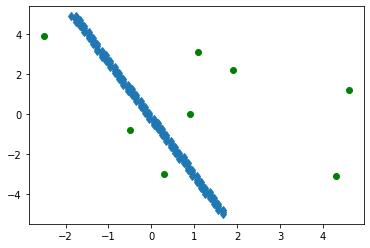

In [120]:
x2 = [[4.3,-3.1],[-2.5,3.9],
      [0.9,0],[1.1,3.1],
      [0.3,-3],[-0.5,-0.8],
      [4.6,1.2],[1.9,2.2]]

y2 = [[0,0],[1,1],[0,1],[0,1],[1,0],[1,1],[0,0],[0,1]]

p = Percerptrons(2,2)
for i in range(50):
    p.learn(x2,y2)
drawP(p,x2,y2)

Сделаем линейно неразделимое множество.

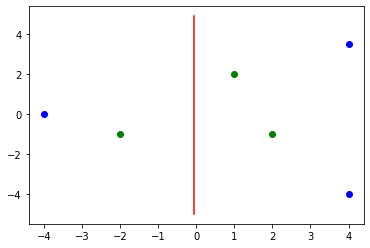

In [105]:
x1 = [[-2,-1],[1,2],
      [2,-1],[4,3.5],
      [4,-4],[-4,0]]
y1 = [0,0,0,1,1,1]

p = Percerptron(2,1)
for i in range(50):
    p.learn(x1,y1)
draw(p,x1,y1)